## 13-1. 들어가며

### **학습 전제**

---

- numpy, pandas를 활용해서 표 데이터를 다뤄본 적이 있고, 이에 대한 기본적인 활용을 할 수 있다.
- pandas의 문법과 다양한 메서드를 활용해본 적이 있고, 코드를 보면 어느정도 이해할 수 있다.
- matplotlib을 활용해서 데이터 시각화를 해본 적이 있고, 코드를 보면 어느정도 이해할 수 있다.
- 데이터셋을 train/test 데이터셋으로 나누어서 모델을 학습 및 검증해본 경험이 있다.

### **학습 목표**

---

- 다양한 피쳐가 있는 데이터셋을 밑바닥부터 샅샅이 뜯어보고, 전설의 포켓몬을 분류하기 위한 피쳐에는 무엇이 있는지 생각해본다.
- 모델 학습을 시작하기 전 모든 컬럼에 대해 그래프 시각화, 피벗 테이블 등을 활용하며 다양한 방법으로 충분한 EDA를 진행한다.
- 모델 학습에 넣기 위해서 전처리가 필요한 범주형/문자열 데이터에 대한 전처리를 원-핫 인코딩 등으로 적절하게 진행한다.
- 전체 데이터셋을 train/test 데이터셋으로 나누고, 적절한 분류 모델(Decision Tree)을 선택해 학습시키며 베이스라인과 비교해본다.

### **목차**

---

- **1. 포켓몬, 그 데이터는 어디서 구할까**1) 안녕, 포켓몬과 인사해!2) 포켓몬, 그 데이터는 어디서 구할까3) 포켓몬 데이터 불러오기
- **2. 전설의 포켓몬? 먼저 샅샅이 살펴보자!**1) 결측치와 전체 칼럼 2) ID와 이름 3) 포켓몬의 속성 4) 모든 스탯의 총합 5) 세부 스탯 6) 세대
- **3. 전설의 포켓몬과 일반 포켓몬, 그 차이는?**1) 전설의 포켓몬의 Total값2) 전설의 포켓몬의 이름
- **4. 모델에 넣기 위해! 데이터 전처리하기**1) 이름의 길이가 10 이상인가?2) 이름에 자주 쓰이는 토큰 추출3) Type 1 & 2! 범주형 데이터 전처리하기
- **5. 가랏, 몬스터볼!**1) 가장 기본 데이터로 만드는 베이스라인2) 의사 결정 트리 모델 학습시키기3) 피쳐 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?4) 의사 결정 트리 모델 다시 학습시키기

## 13-2. 안녕, 포켓몬과 인사해!
- **EDA(Exploratory Data Analysis):** 분류 문제를 풀기 위해 데이터를 밑바닥부터 샅샅이 뜯어보는 연습

## 13-3. 포켓몬, 그 데이터는 어디서 구할까?

**[Kaggle]** Pokemon with stats    
https://www.kaggle.com/abcsds/pokemon

In [1]:
#터미널 명령어
'''
$ unzip pokemon.zip
$ ls

--------------------

$ mkdir -p ~/aiffel/pokemon_eda/data
$ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/Pokemon.csv

----------------------

$ mv Pokemon.csv ~/aiffel/pokemon_eda/data
'''

'\n$ unzip pokemon.zip\n$ ls\n\n--------------------\n\n$ mkdir -p ~/aiffel/pokemon_eda/data\n$ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/Pokemon.csv\n\n----------------------\n\n$ mv Pokemon.csv ~/aiffel/pokemon_eda/data\n'

## 13-4. 포켓몬 데이터 불러오기
### 라이브러리 가져오기


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


- numpy와 pandas는 1차원 또는 2차원 형식의 표 데이터를 다루기에 최적화된 라이브러리입니다.
- seaborn과 matplotlib 은 데이터를 그래프 등으로 시각화할 때 쓰이죠. 특히, seaborn은 matplotlib의 상위 버전으로, matplotlib이 조금 더 단순하지만 raw한 느낌이라면, seaborn은 보다 고급화된 그래프를 그릴 수 있습니다.

### 데이터셋을 pandas로 불러오기

In [5]:
import os
csv_path = os.getenv("HOME") +"/aiffel/pokemon_eda/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)


**pokemon** 변수에 데이터 저장, pandas로 데이터 표현

In [4]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


- 원본 데이터를 복사하여 **pokemon**이라는 변수를 새로 만들어 사용
- 데이터셋에 다양한 작업할 예정이므로 원본 데이터를 훼손 방지 위함   
<br/>    
- 타겟 데이터: **Legendary(전설의 포겟몬인지 아닌지의 여부)** 
- **Legendary == True** 값을 가지면 **Legendary** 변수
- **Legendary == False** 값을 가지면 **ordinary** 변수


In [7]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()



(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [8]:
# 일반 포켓몬 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()



(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


----

## 13-5. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (1) 결측치와 전체 칼럼

### 빈 데이터 확인하기

In [11]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

- **Type 2** 컬럼에만 총 386개의 결측치
- 빈 데이터를 다를 때 방법이 여러가지 있음

### 전체 칼럼 이해하기

In [12]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

- '#' : 포켓몬 Id number. 같은 포켓몬이지만 성별이 다른 경우 등은 같은 #값을 가진다. int
- Name : 포켓몬 이름. 포켓몬 각각의 이름으로, 이름 데이터는 800개의 포켓몬이 모두 다르다. (unique) str
- Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. str
- Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. str
- Total : 전체 6가지 스탯의 총합. int
- HP : 포켓몬의 체력. int
- Attack : 물리 공격력. (scratch, punch 등) int
- Defense : 물리 공격에 대한 방어력. int
- Sp. Atk : 특수공격력. (fire blast, bubble beam 등) int
- Sp. Def : 특수공격에 대한 방어력. int
- Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) int
- Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int
- Legendary : 전설의 포켓몬 여부. !! Target feature !! bool

--- 

## 13-6. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (2) ID와 이름

## '#' : ID number

In [16]:
len(set(pokemon["#"]))

721

- 전체 데이터: 800개 
- '#' 컬럼을 집합으로 만든 자료형 데이터: 721개
- 파이썬의 **집합(set)** 자료형은 중복 데이터를 가질 수 없음
- '#' 칼럽 값은 unique하지 않음(index로 사용 불가) = 같은 번호를 가지는 칼럼이 있음

In [22]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


- '#'6 의 포켓몬은 3 종류
- 기본: Charizard, 진화한: CharizardMega Charizrd
- X, Y 성병을 나눔

## name: 이름

- 문자열 데이터

In [23]:
len(set(pokemon["Name"]))

800

- 데이터 개수: 800개 (all)
- 모든 이름은 unique함을 알 수 있다.

----

## 13-7. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (3) 포켓몬의 속성

### Type 1 & Type 2 : 포켓몬의 속성

In [29]:
pokemon.loc[[6,10]] #loc 데이터 추출

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


- 6번 포켓몬은 속성 2개
- 8번 포켓몬은 속성 1개(Type2: NaN)

In [30]:
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [31]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

- Type1, 2의 차집합은 NaN. 
- NaN 데이터 외에 나머지 18가지 속성 모두 같은 세트의 데이터를 알 수 있음.

In [32]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Ice', 'Dragon', 'Ground', 'Water', 'Fairy', 'Poison', 'Bug', 'Fighting', 'Psychic', 'Electric', 'Fire', 'Grass', 'Rock', 'Ghost', 'Normal', 'Dark', 'Flying', 'Steel']


In [33]:
pokemon["Type 2"].isna().sum()

386

- 총 386개의 포켓몬은 속성을 하나만 가지고있음.
- 800 - 386 = 414개의 포켓몬은 두 개의 속성을 가지고 있음.

### Type 1 데이터 분포 plot
- 데이터가 일반 포켓몬보다 전설의 포켓몬 수가 매우 적은 불균형 데이터
- 전설의 포켓몬 따로 시각화 할 필요성 있음  
<br/>   

- **plt**의 **subplot**을 활용하여 두 개의 그래프를 한 번에 그리고 그래프 **sns(seaborn)**의 **countplot**을 활용
- **countplot**은 말 그대로 데이터의 개수를 표시하는 **plot

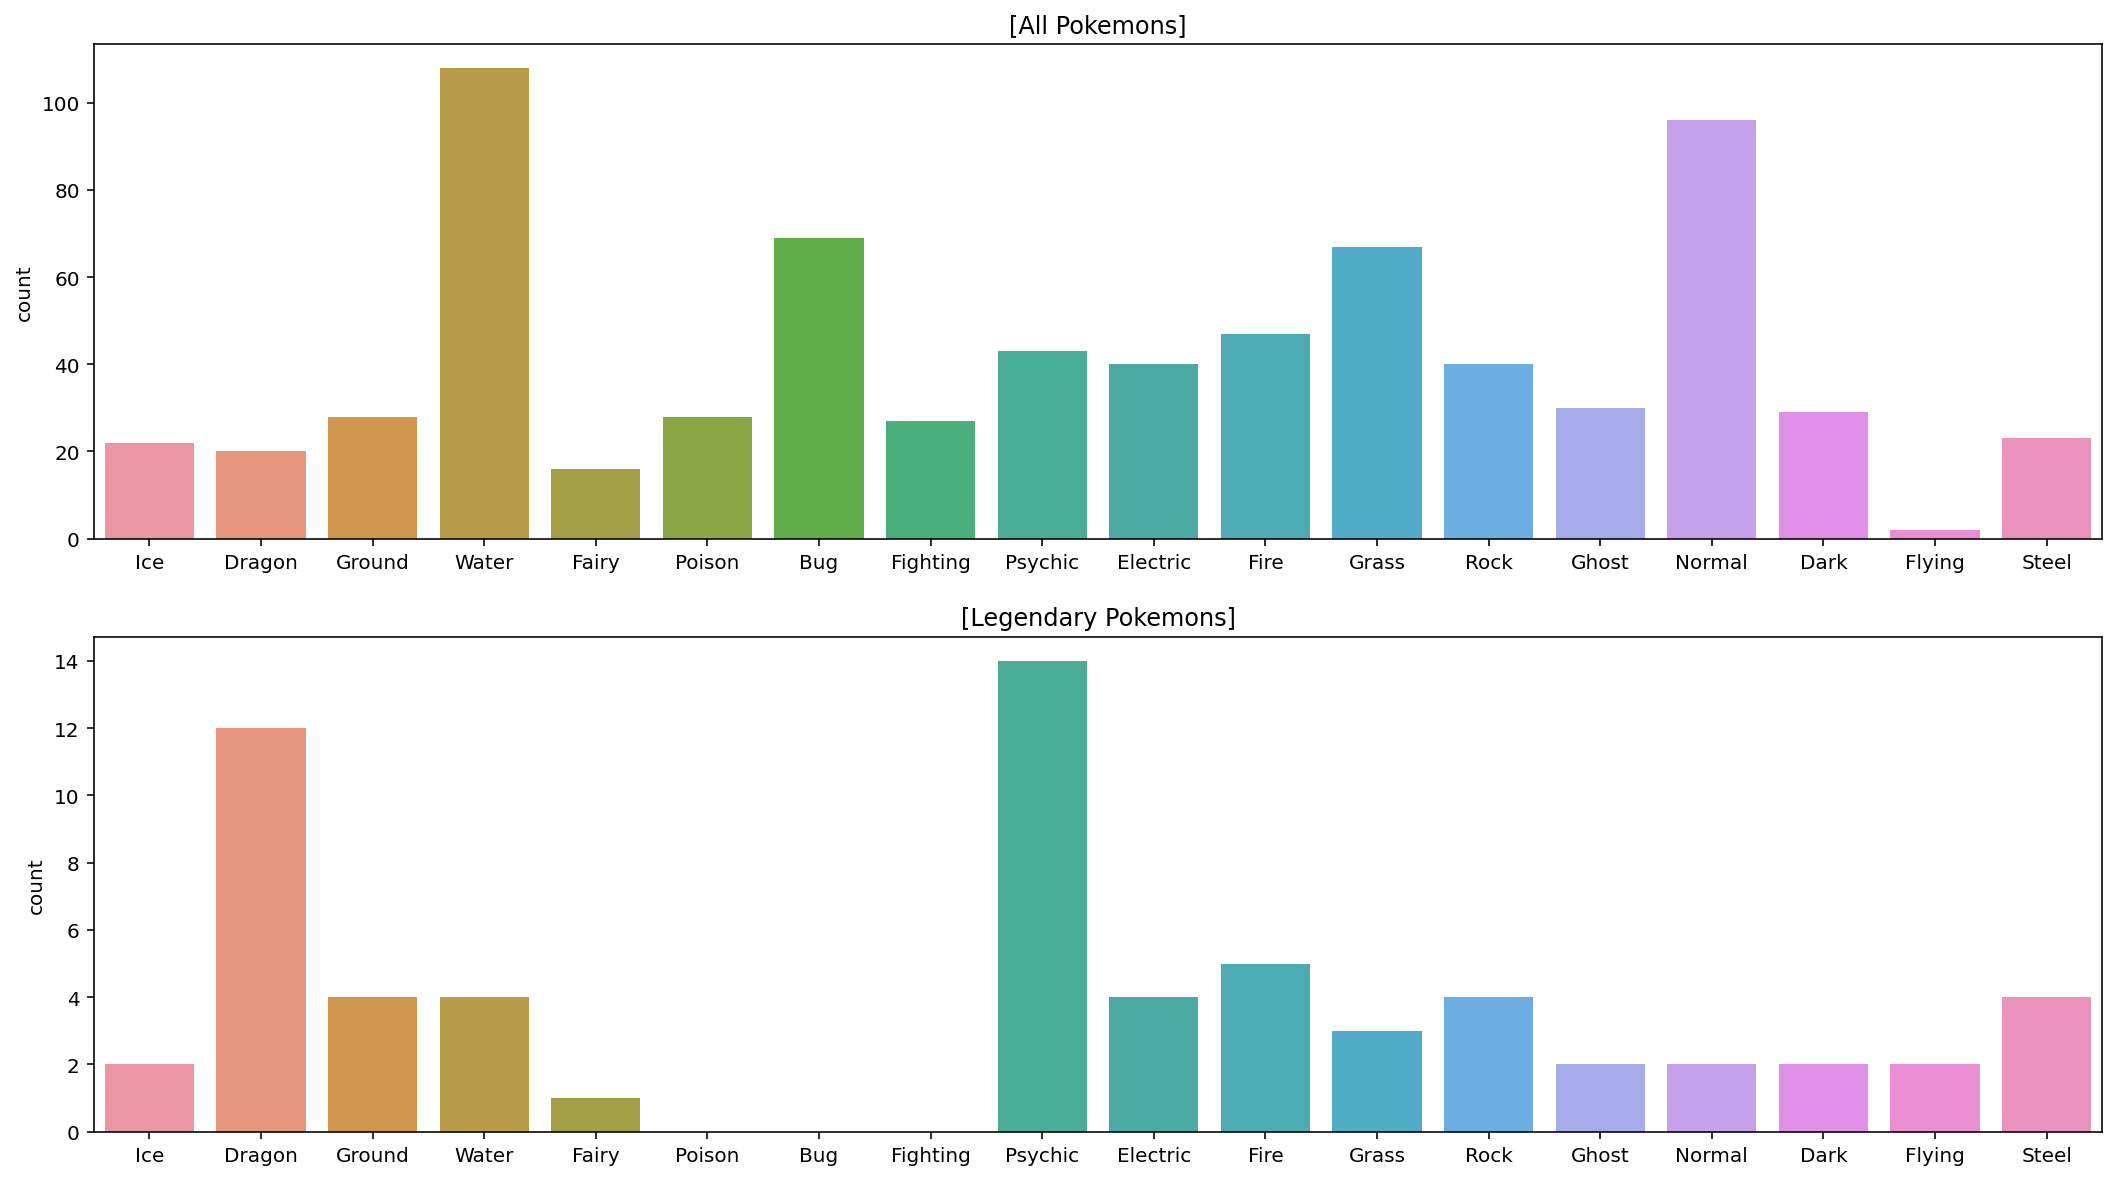

In [39]:
plt.figure(figsize=(18, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[All Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

**EDA(Exploratory Data Analysis)**
- 일반 포켓몬: 물, 일반, 벌레 속성이 많음.
- 전설의 포켓몬: 용, 신령 속성이 많음.

In [40]:
# Type1별로 Legendary 의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)


,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


- 피벗 테이블(pivot table)로 각 속성에 Legendary 포켓몬들 비율 확인
- **sort_value** 를 활용하여 높은 것부터 낮은 거 정렬

=> **Flying** 50% 비율로 가장 높은 비율을 보임

### Type 2 데이터 분포 plot

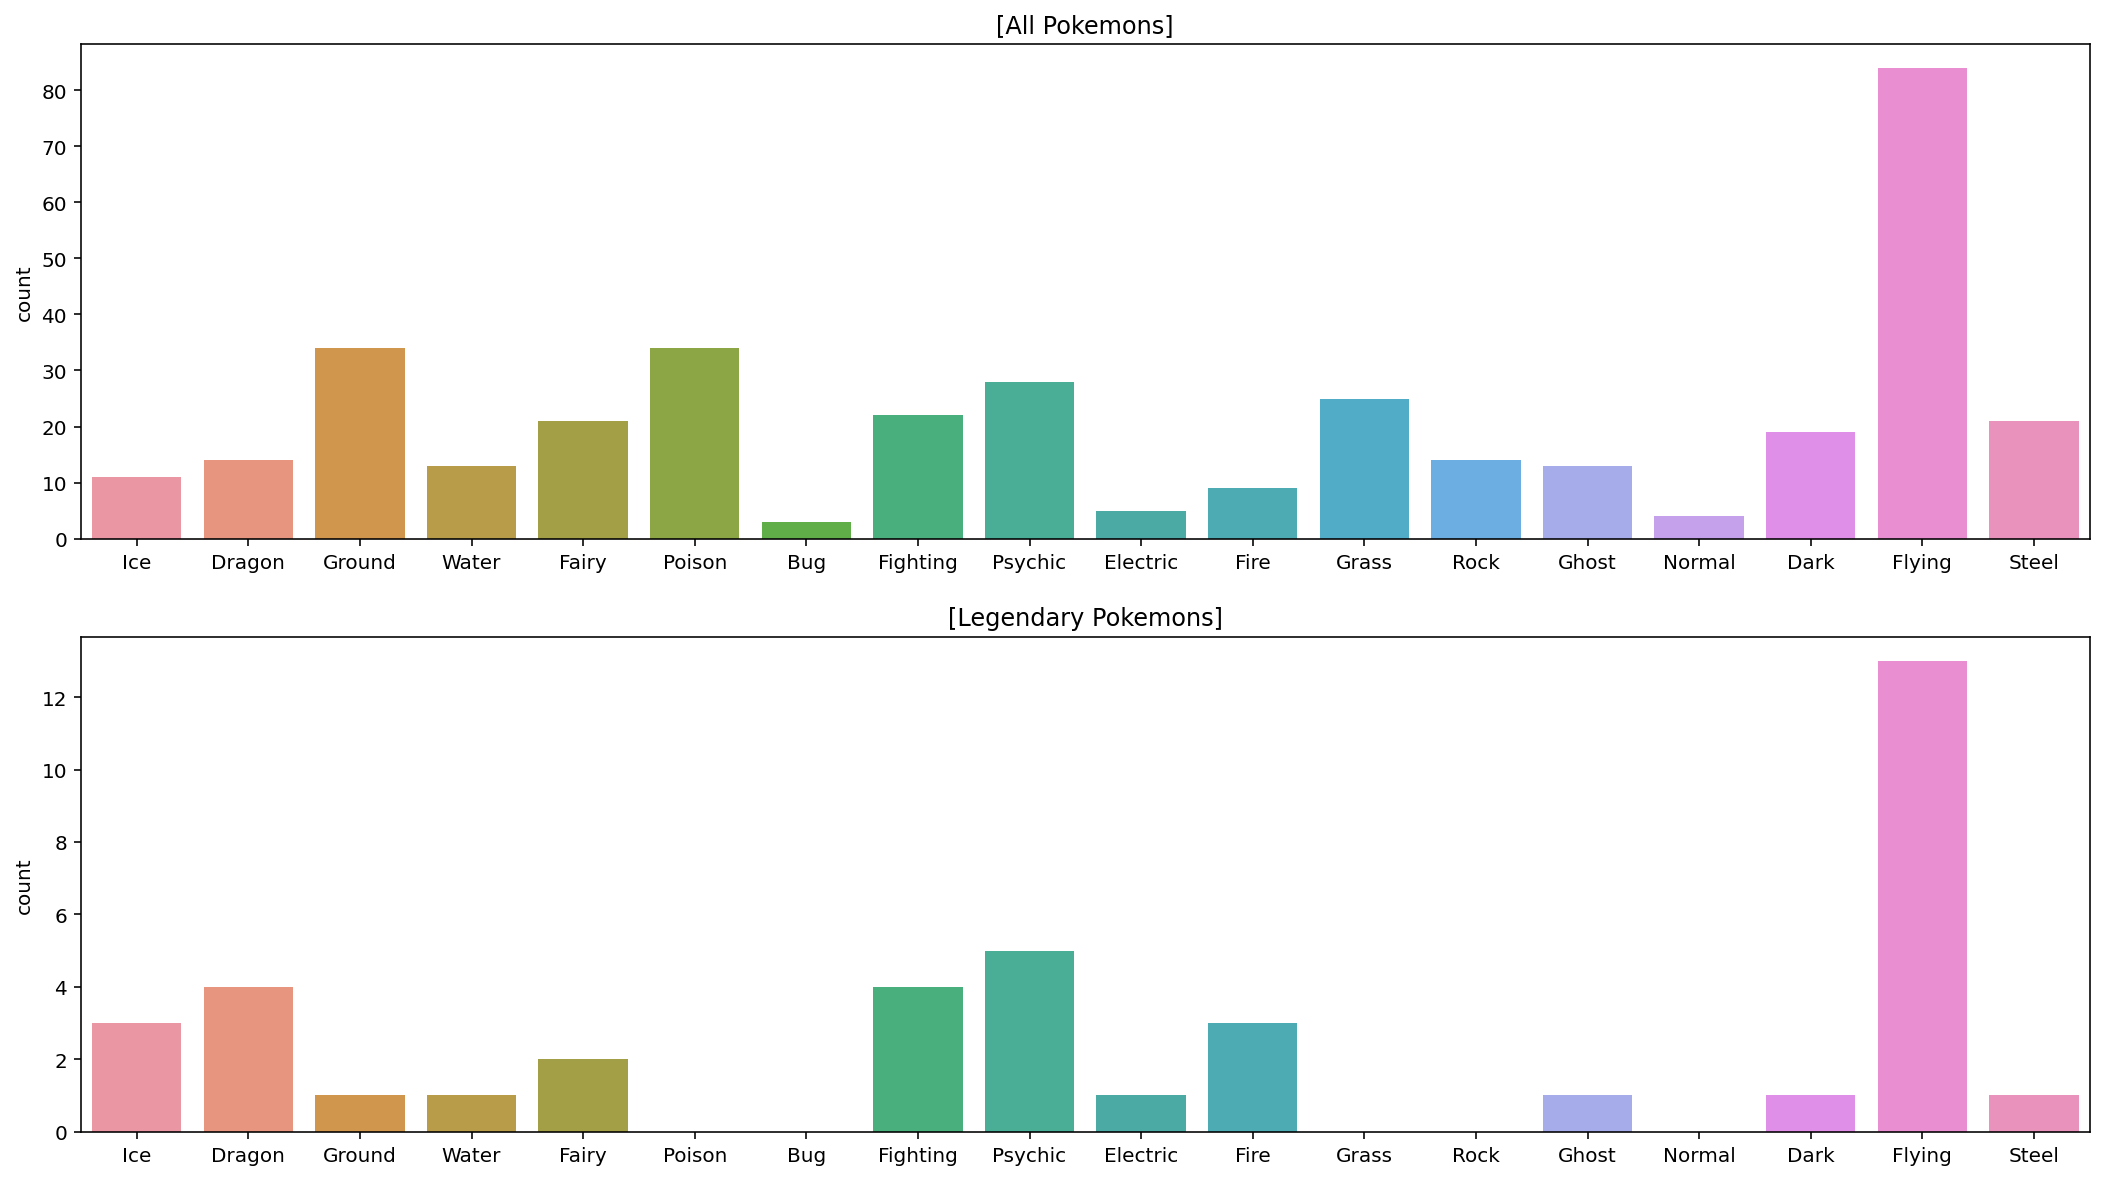

In [41]:
plt.figure(figsize=(18, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[All Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

- Type 2에는 NaN(결측값)이 존재 
- Countplot을 그릴 때는 결측값은 자동으로 제외   
<br/>   
- Flying 속성의 경우 두 경우 다 가장 많음
- 일반 포켓몬에는 Grass, Rock, Poison같은 속성이 많음
- 전설의 포켓몬은 하나도 없습니다.
- 대신 여전히 Dragon, Psychic과 더불어 Fighting과 같은 속성이 많습니다.

In [42]:
# Type2별로 Legendary 의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)



,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


- Type2에서는 **Fire** 속성 포켓몬의 Legendary 비율이 25%로 가장 높음

------

## 13-8. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (4) 모든 스탯의 총합

### Total : 모든 스탯의 총합

- 데이터셋에서 포켓몬은 총 6가지 스탯 값을 가짐
- **Total** 칼럼은 6가지 속성값의 총합   
<br/>   
- 모든 스탯의 종류를 **stats**라는 변수에 저장


In [43]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

**실제 6개 스탯의 총합과 데이터에서 제공된 Total 값이 맞는지 확인**

In [44]:
print("#0 pokemon: {}\n".format(pokemon.loc[0, "Name"]))
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon: Bulbasaur

total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


- 첫 번째 포켓몬에 대해서 Total 값이 318로 일치

In [45]:
sum(pokemon['Total'].values == pokemon[stats].values.sum(axis=1))

800

- **pokemon['Total'].values** 와**pokemon[stats].values**들의 총합이 같은 포켓몬의 개수 **sum**으로 확인
- **stats**의 경우 포켓몬별로 가로 방향으로 더해야하므로 **axis=1**

### Total값에 따른 분포 plot

- **Total** 값과 **Legendary** 는 어떤 관계가 있을지 확인

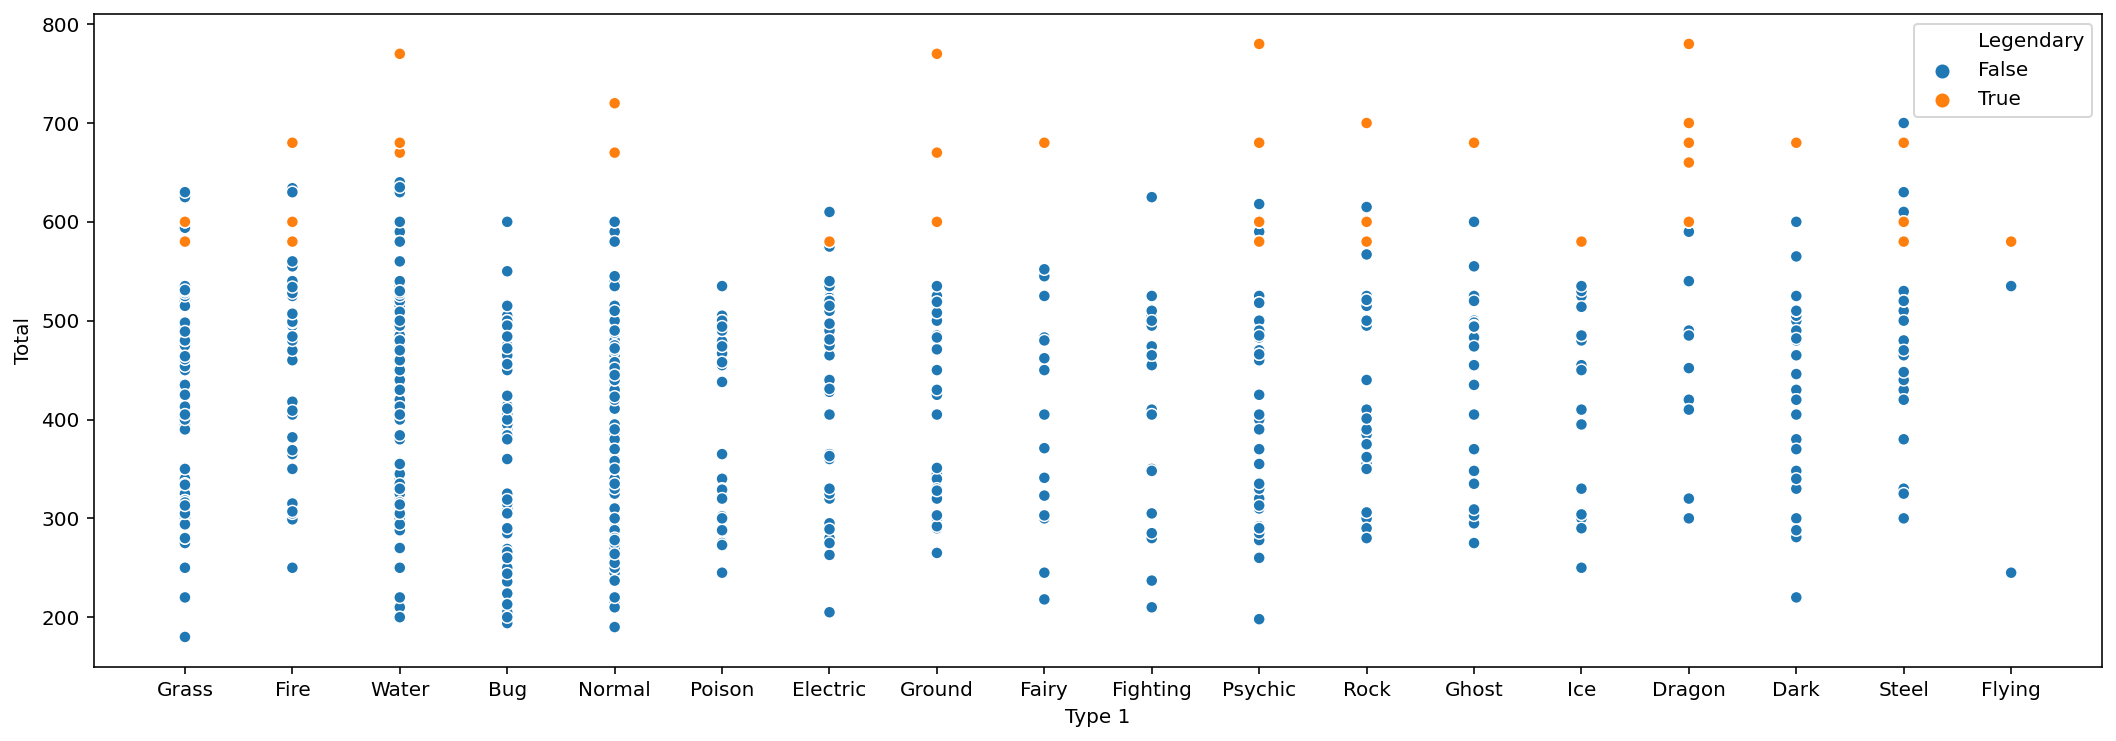

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

- **Legendary** 여부에 따라 색깔(hue) 차별
- 점의 색깔을 보면 Type 1 별로 Total 값을 확인했을 때, 전설의 포켓몬은 주로 Total 스탯 값이 높다는 것이 확인

----

## 13-9. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (5) 세부 스탯

### 세부스탯: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed
- **subplot**으로 여러 그래프를 한 번에 확인

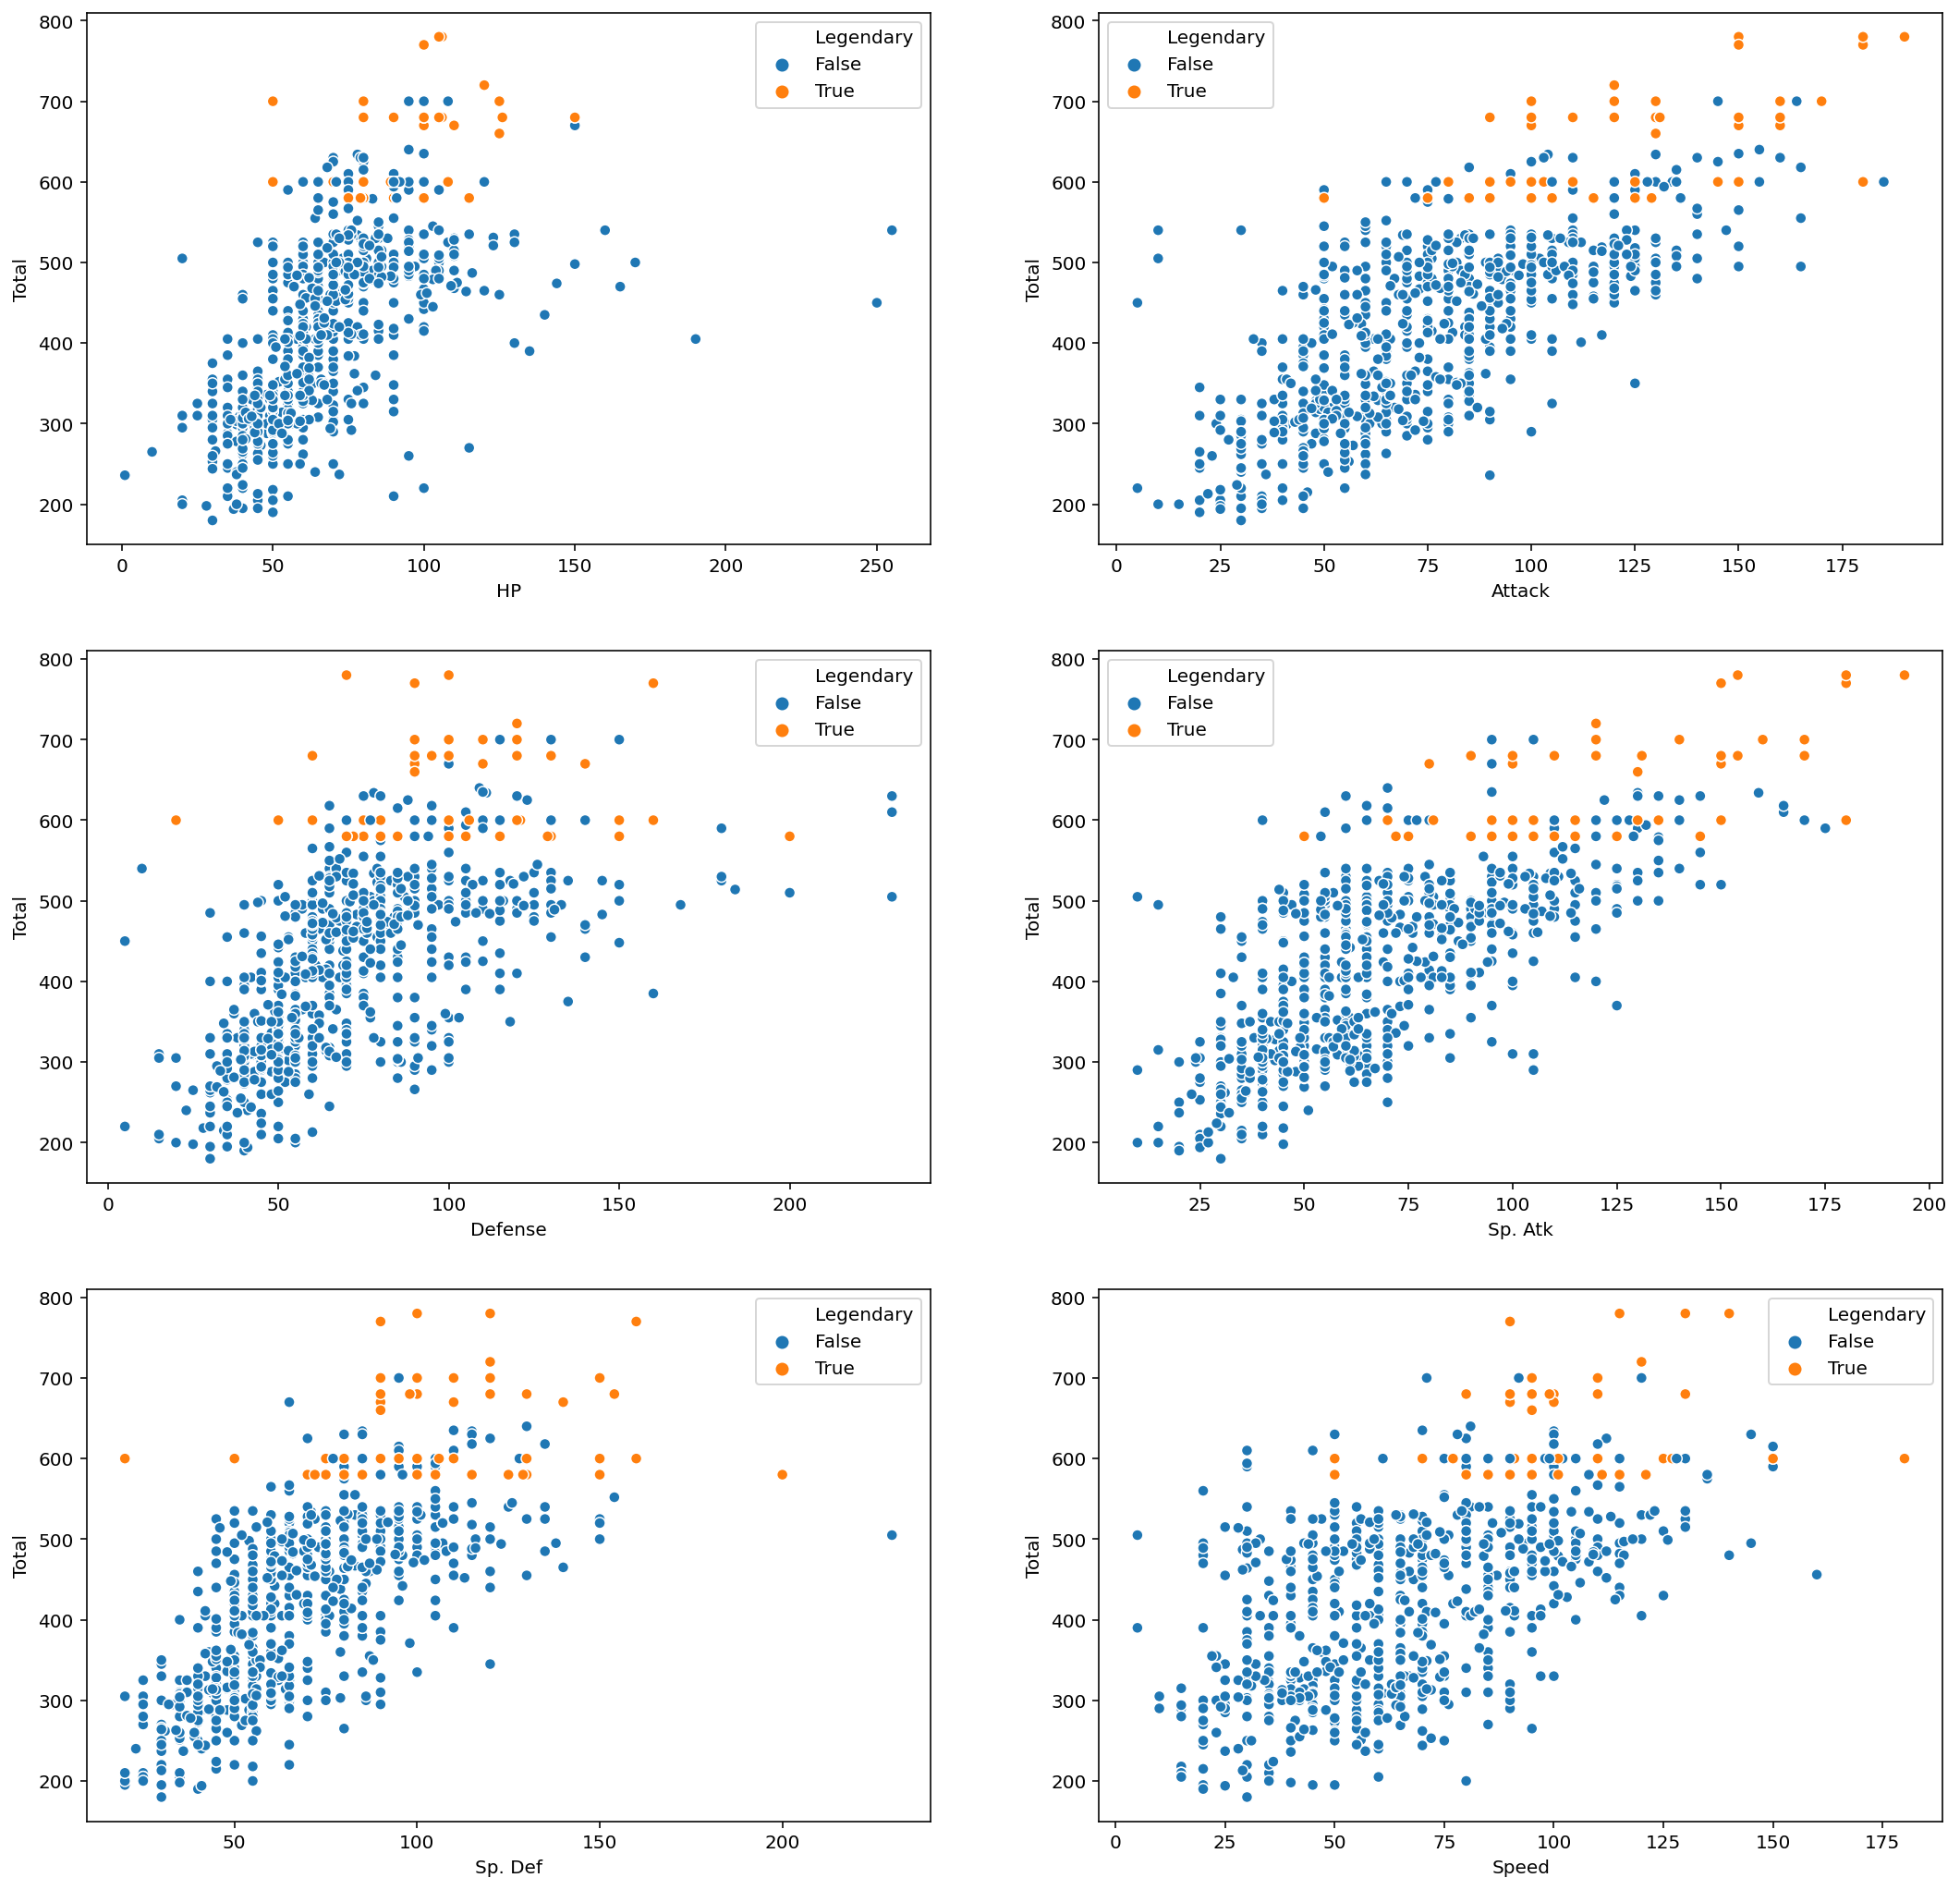

In [47]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(18, 18)

sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)
plt.show()

### 각 스탯에 대한 분석

**HP, Defense, Sp. Def**

- 전설의 포켓몬은 주로 높은 스탯을 갖지만, 이 세 가지에서는 일반 포켓몬이 전설의 포켓몬보다 특히 높은 몇몇 포켓몬이 있었다.
- 그러나 그 포켓몬들도 Total 값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 포켓몬들로 보인다. (ex. 방어형, 공격형 등)

**Attack, Sp. Atk, Speed**

- 이 세 가지 스탯은 Total과 거의 비례한다. 전설의 포켓몬이 각 스탯의 최대치를 차지하고 있다.

----

## 13-10. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (6) 세대

### Generation : 포켓몬의 세대
- 1~6세대의 포켓몬이 존재

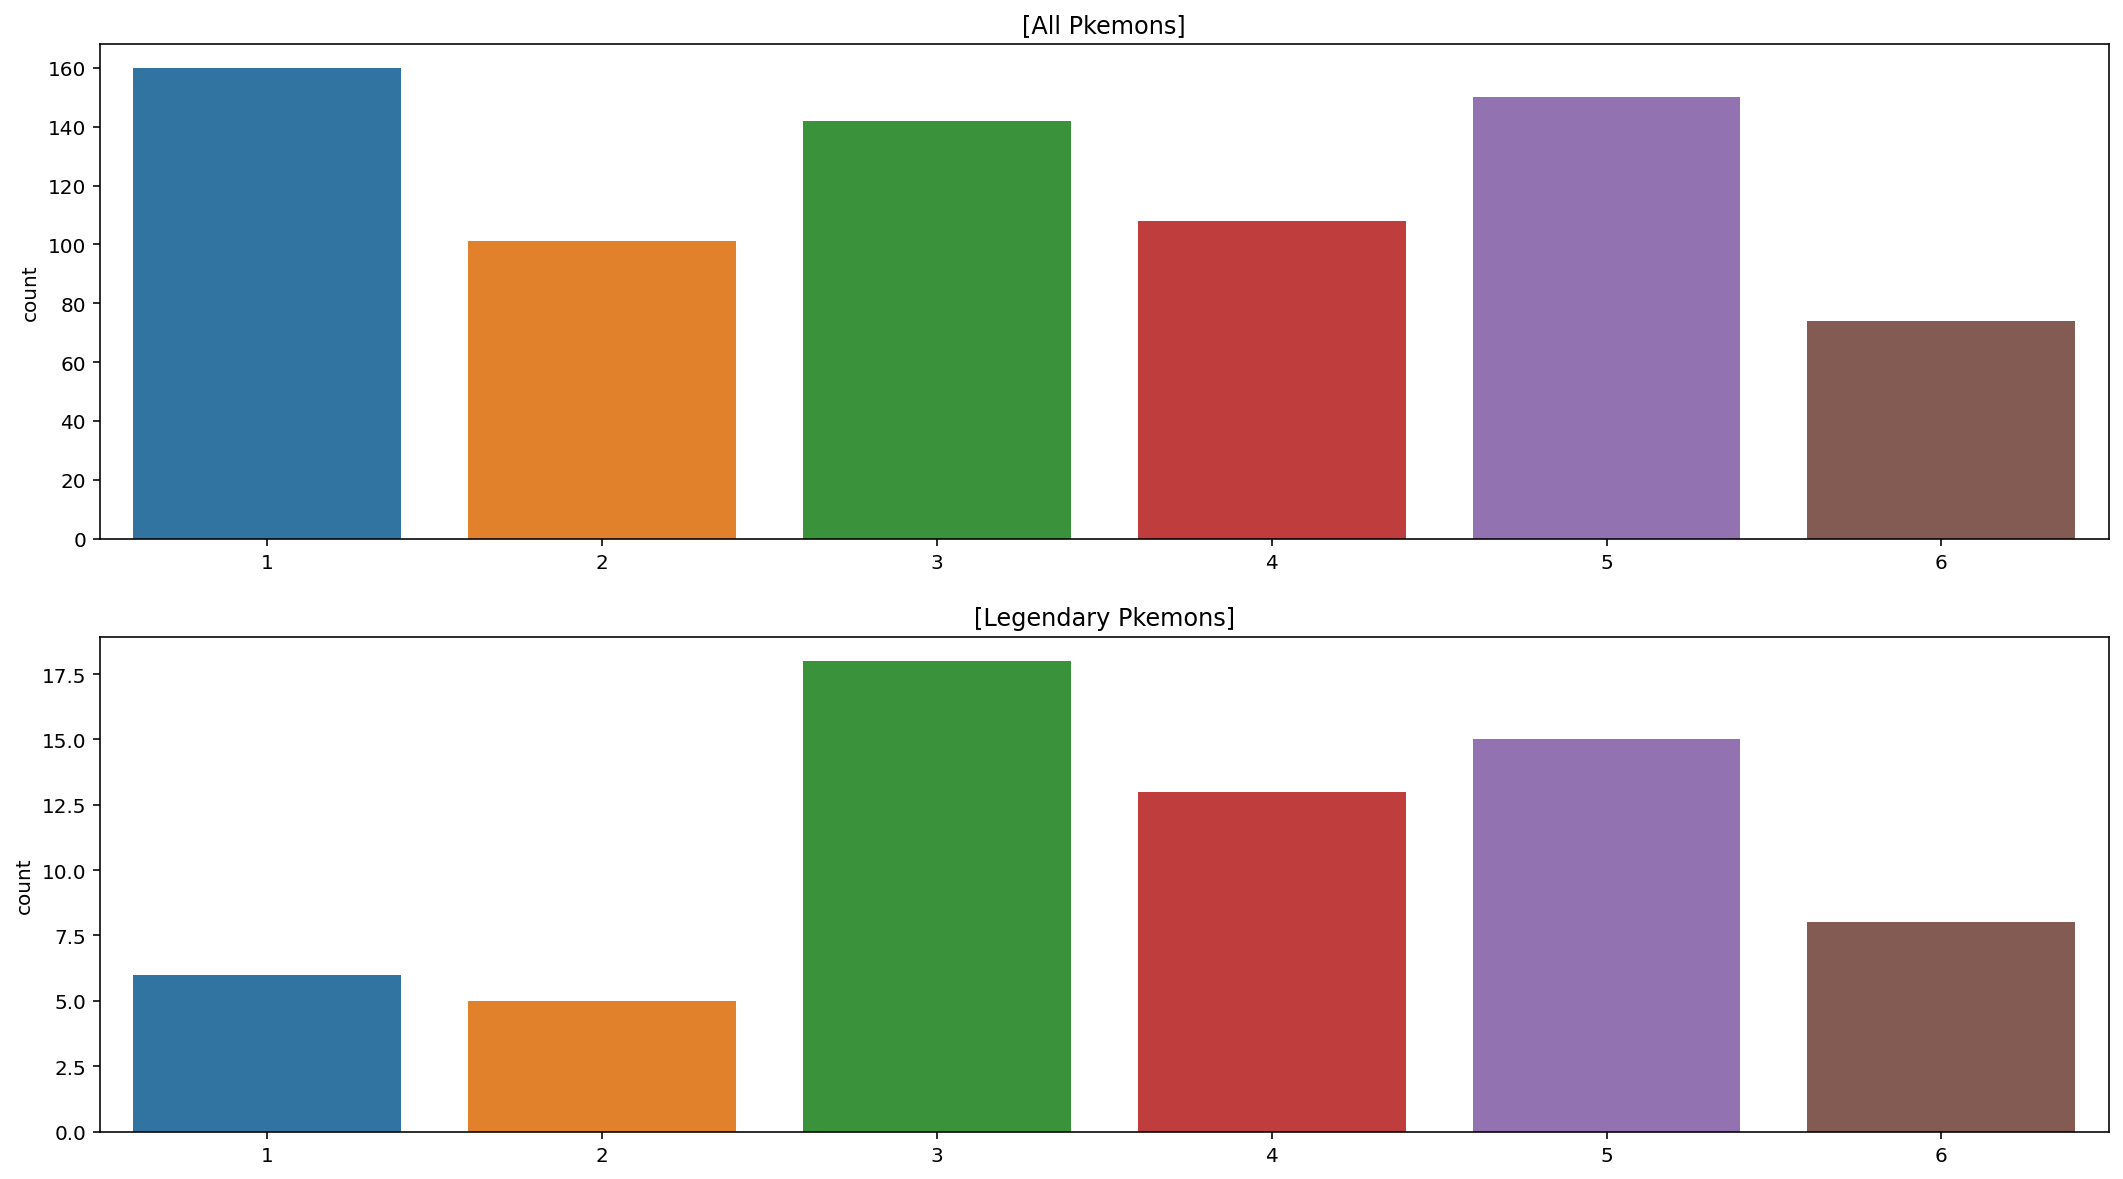

In [49]:
plt.figure(figsize=(18, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[All Pkemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pkemons]")

plt.show()

- 전설의 포켓몬은 1, 2세대에는 많이 보이지 않음.
- 3세대부터 많아졌다가 6세대에 다시 줄어듦.

----

## 13-11. 전설의 포켓몬과 일반 포켓몬, 그 차이는? (1) Total값
- **legendary**, **Ordinary**포켓몬 분리하여 분석

### 전설의 포켓몬의 Total값

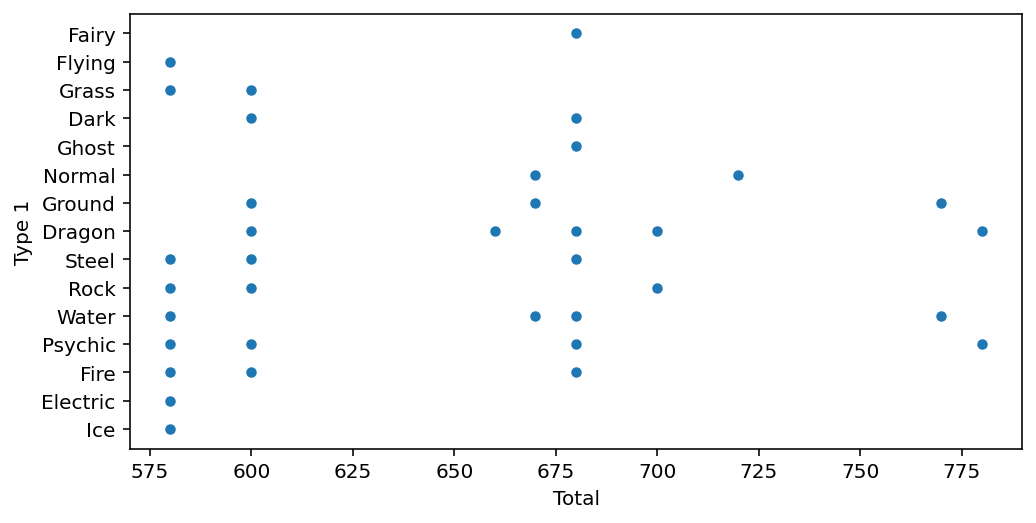

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

**[특징]**
- **Total** 값들이 600 등 과 같은 특정 점에서 몰려있음

In [51]:
sorted(list(set(legendary["Total"])))

[580, 600, 660, 670, 680, 700, 720, 770, 780]

- 9가지 값밖에 존재하지 않음

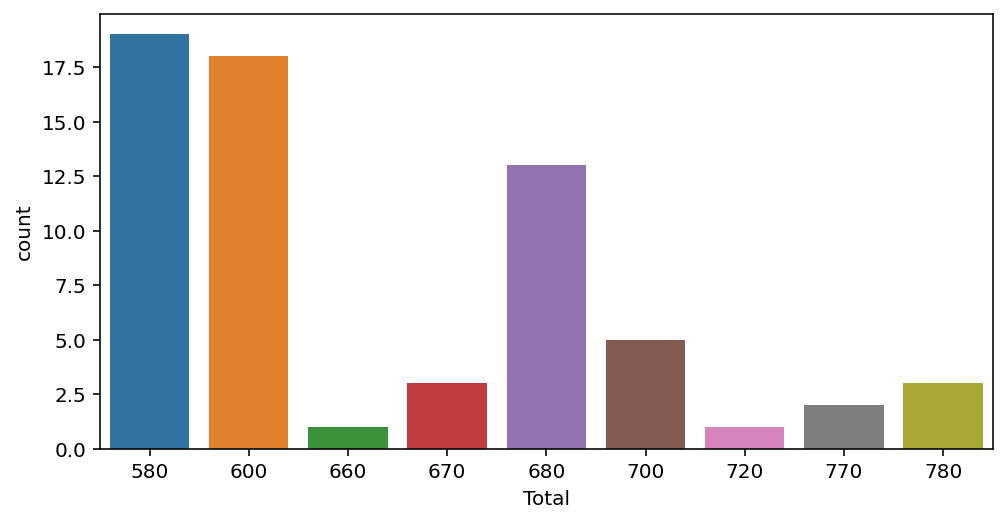

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

- 총65마리 전설의 포켓몬이 9개의 **Total** 값을 가짐

In [53]:
round(65 / 9, 2)

7.22

- **약 7.22마리 끼리는 같은 Total 스탯 값을 가짐** 

**ordinary 포켓못 동일한 방법으로 확인**

In [54]:
print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


In [55]:
len(sorted(list(set(ordinary["Total"]))))

195

- 195가지의 Total 속성값을 가짐
- 전체 일반 포켓몬은 (800 - 65 = 735) 735 마리

In [56]:
round(735/195, 2)

3.77

- **3.77마리만 같은 Total 스탯을 가짐**    
<br/>   
- Total값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 가까이 된다. 즉 전설의 포켓몬의 Total값은 다양하지 않다.
**=> 한 포켓몬의 Total 속성값이 전설의 포켓몬의 값들 집합에 포함되는지의 여부는 전설의 포켓몬임을 결정하는 데에 영향을 미친다.**    
   
   
- 또한, 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재한다. ex) 680, 720, 770, 780
**=> Total값은 전설의 포켓몬인지 아닌지를 결정하는 데에 이러한 방식으로도 영향을 미칠 수 있다.**   
    
**[결론]**
- **Total** 값은 **legendary**인지 아닌지 예측하는 데 중요한 컬럼

## 13-12. 전설의 포켓몬과 일반 포켓몬, 그 차이는? (2) 이름

- 전설의 포켓몬들의 이름에 특정한 단어가 들어있음
- 또는 긴 이름을 가진 경우가 있음

In [57]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


- pd.concat으로 비슷한 이름을 합침
- **"MewTwo", "Latias", "Latios", "Kyogre", "Groudon", "Rayquaza", "Kyurem"** 등의 이름에서부터 그 앞에 성이 붙음

In [58]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


- 이름에 **forme**가 들어가는 여러 가지 전설의 포켓몬 존재

**긴 이름**

- **legendary**와 **ordinary** 각각에 모두 **"name_count"**라는 이름의 길이를 나타내는 컬럼 만들기    

   
    
**람다 참고내용**
https://wikidocs.net/64

In [59]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [60]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


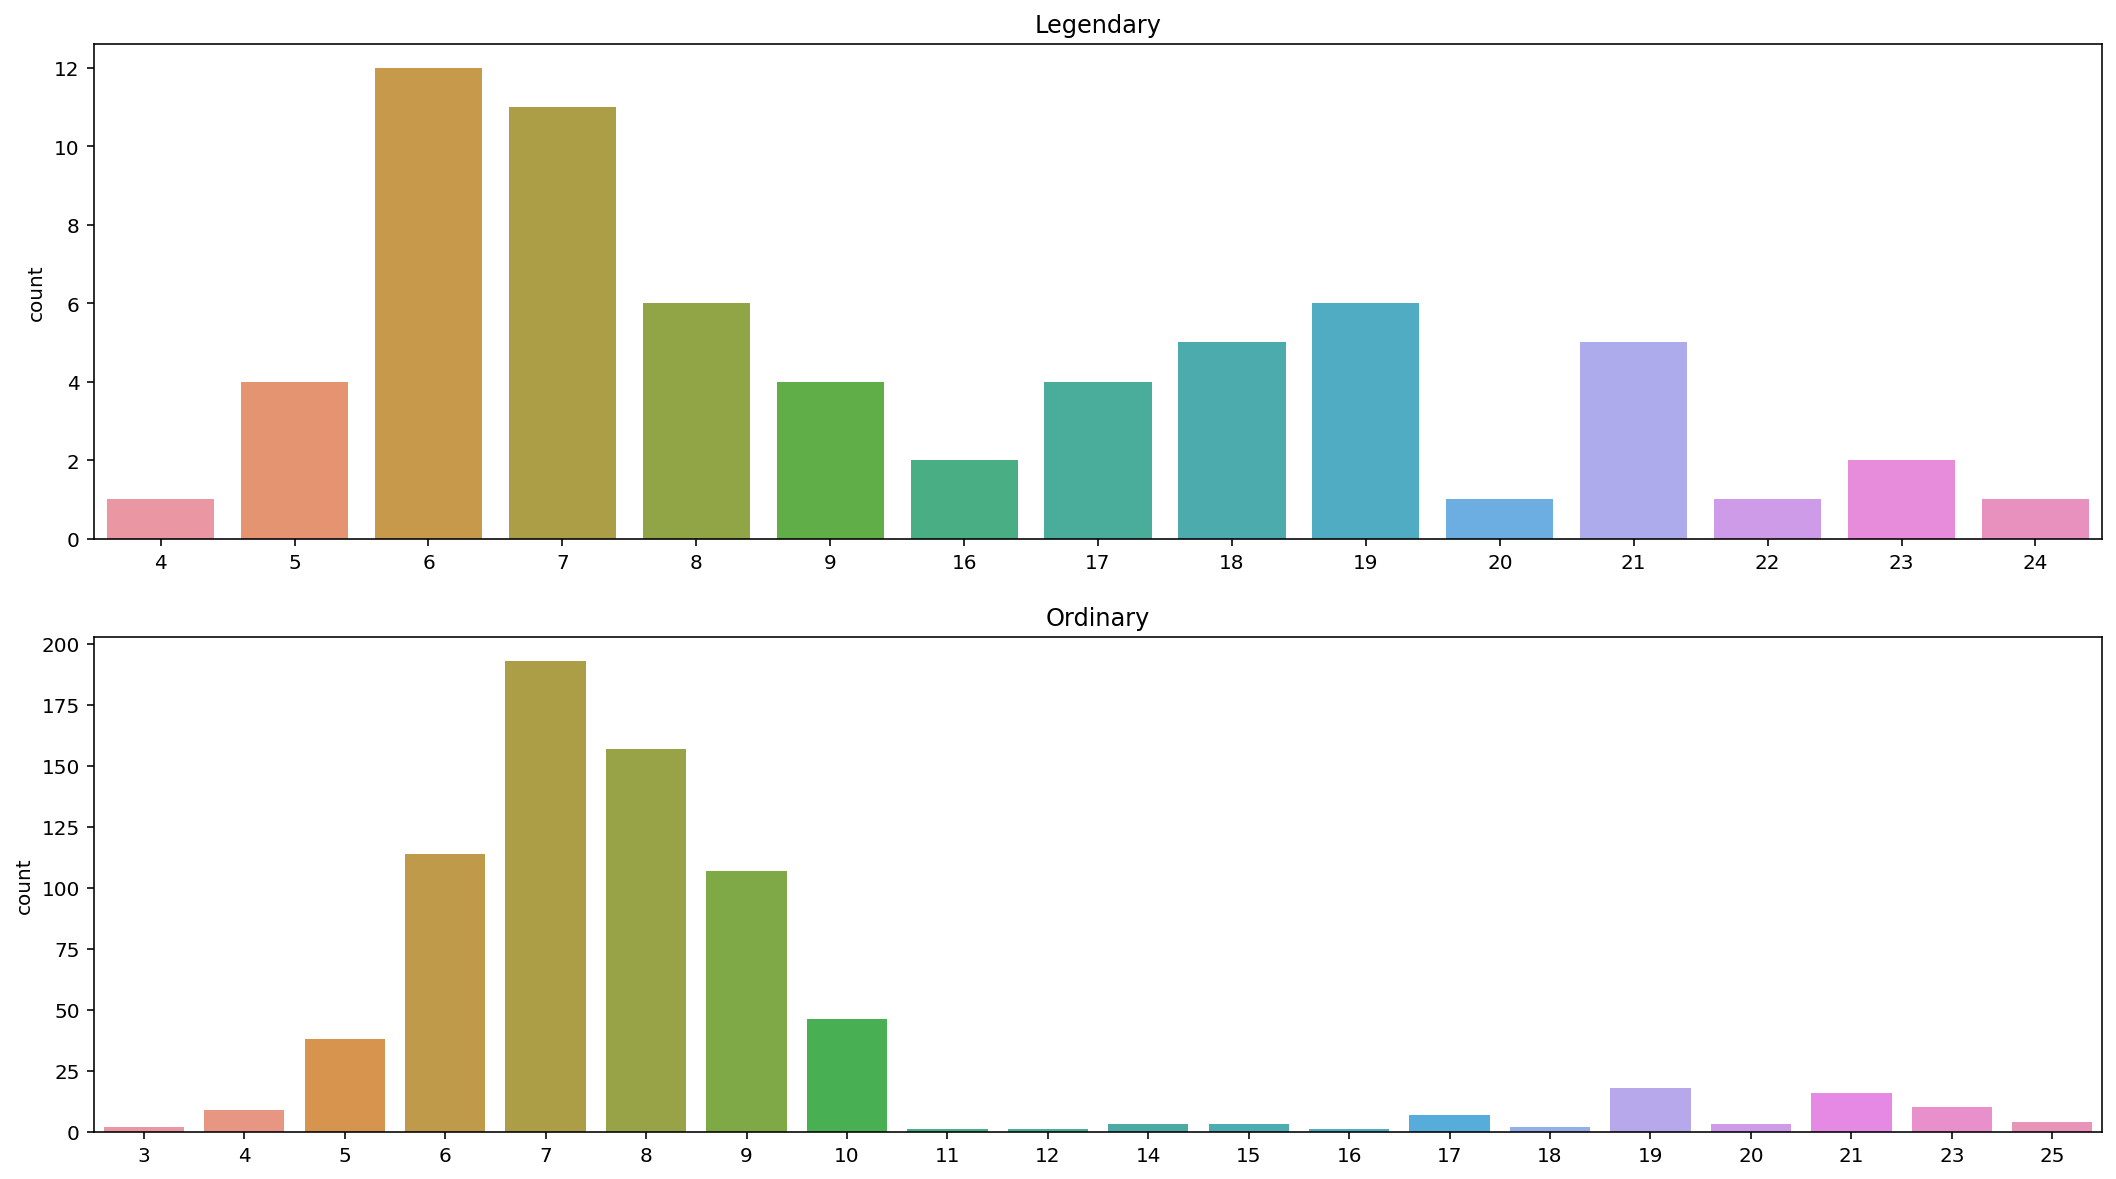

In [61]:
plt.figure(figsize=(18, 10))

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

- 전설의 포켓몬은 16 이상의 긴 이름을 가진 포켓몬이 많은 반면, 
- 일반 포켓몬은 10 이상의 길이를 가지는 이름의 빈도가 아주 낮습니다.



In [62]:
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


- 전설의 포켓몬의 이름이 10 이상일 확률: 41.54%

In [63]:
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


- 일반 포켓몬의 이름이 10 이상일 확률: 15.65%

**[결론]**    
- 만약 "Latios"가 전설의 포켓몬이라면, "%%% Latios" 또한 전설의 포켓몬
- 적어도 전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재
- 전설의 포켓몬은 긴 이름을 가졌을 확률이 높음

----

## 13-13. 모델에 넣기위해! 데이터 전처리하기 (1) 이름의 길이가 10 이상인가?

- 데이터 분석을 통해 머신러닝 수행할 때 주의할 점이 많음
- 데이터를 모델에 입력할 수 있는 형태로 변환이 필요
- 문자열은 처리가 불가능하므로 숫자 데이터 또는 부울(bool)데이터 등으로 전처리 과정 필요    
**=> 지금까지 수행한 EDA 결과에 따라 이름 컬럼을 모델이 연산할 수 있는 형태로 처리** 

<br/>
    
- **이름**은 결정짓는 중요한 특징 중 하나였음.
- **이름**에 관해서 두 가지를 중점적으로 처리
    - **이름의 길이** : name_count 컬럼을 생성 후 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼을 생성

    - **토큰 추출** : legendary 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩(One-Hot Encoding)으로 처리

### (1) 이름의 길이가 10 이상인가 아닌가
- 이름의 길이를 확인할 수 있는 name_count 컬럼을 생성

In [64]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


이름의 길이가 10 이상이면 True, 미만이면 False를 가지는 long_name 컬럼을 생성합니다.

In [65]:
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


- **전설의 포켓몬을 분류하는 데, name_count & long_name 중 무엇이 유리할지는 아직 모름**

---

## 13-14. 모델에 넣기위해! 데이터 전처리하기 (2) 이름에 자주 쓰이는 토큰 추출

**포켓몬의 이름은 4가지 타입**
- 한 단어면 ex. Venusaur
- 두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 ex. VenusaurMega Venusaur
- 이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 ex. CharizardMega Charizard X
- 알파벳이 아닌 문자를 포함하는 경우 ex. Zygarde50% Forme

**이름에 알파벳이 아닌 문자가 들어간 경우 전처리하기**
- 어떤 문자열이 알파벳으로만 이루어져 있는지를 확인하고 싶을 때는 isalpha() 함수를 사용
- 알파벳이 아닌 문자를 포함하는 이름을 걸러내고 싶은데, 주의할 점은 이름에 띄어쓰기가 있는 경우에도 **isalpha() = False**로 처리된다는 점     
=>  알파벳 체크를 위해 띄어쓰기가 없는 컬럼을 따로 만들어준 후, 띄어쓰기를 빈칸으로 처리

In [66]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [67]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [68]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


- 이름에 알파벳이 아닌 것을 포함하는 경우 9마리
- 직접 바꿔줄 수 있는 데이터의 개수
- 문자열을 다른 문자열로 바꾸고 싶을 때 **pandas**의 **replace** 함수 사용

In [69]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [70]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]



,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


- name_isalpha 컬럼이 False인 컬럼이 하나도 없음.
- 모든 이름이 알파벳으로만 이루어짐

**이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기**
- 이름은 세 가지 타입으로 나뉘므로 토큰화(tokenizing) 가능
- 문자열 처리 시 주로 **정규표현식(RegEx: Regular Expression)** 기법 사용
- **정규표현식**: 문자열을 처리하는 방법의 하나로, 특정한 조건을 만족하는 문자를 검색하거나 치환하는 등의 작업을 하고 싶을 때 간편하게 처리할 수 있게 해주는 도구


In [71]:
import re

In [72]:
name = "CharizardMega Charizard X"

In [74]:
#먼저 이름을 공백을 기준으로 나눔
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [75]:
temp = name_split[0]
temp

'CharizardMega'

- 이 붙어있는 이름을 우리는 대문자로 시작해서 소문자로 끝나는 토큰들로 분리하고 싶습니다.
- 그러기 위해서는 대문자로 시작해서 소문자로 끝나는 패턴을 찾으면 됩니다.
- 패턴을 찾는 것은 앞서 import 한 re 패키지의 findall 함수를 이용해서 실행할 수 있습니다.

In [76]:
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

- [A-Z] : A부터 Z까지의 대문자 중 한 가지로 시작하고,
- [a-z] : 그 뒤에 a부터 z까지의 소문자 중 한 가지가 붙는데,
- '* ' : 그 소문자의 개수는 하나 이상인 패턴 (*는 정규표현식 중에서 "반복"을 나타내는 기호)

In [77]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

**지금까지 진행한 토큰화 과정을 모든 이름에 적용**

In [78]:
def tokenize(name):
    name_split = name.split(" ")

    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
        
    return np.array(tokens)

In [79]:
name = "CharizardMega Charizard X"
tokenize(name)                          #tokenize() 코드로 이름 모두 토큰화

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [80]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

**Counter**함수 이해

In [81]:
from collections import Counter

In [82]:
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [83]:
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [84]:
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [85]:
for token, _ in most_common:
    pokemon[token] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


- Pandas에서 문자열 데이터셋에 특정 구문이 포함되어 있는지 여부는 str.contains 함수로 간단히 확인

-----

## 13-15. 모델에 넣기위해! 데이터 전처리하기 (3) Type1 & 2! 범주형 데이터 전처리하기

**Type** 컬럼 처리
- 18가지의 모든 Type를 모두 **원-핫 인코딩(One-Hot Encoding)**
- 두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 한다.

**원-핫 인코딩**
: 주어진 카테고리 중 단 하나만 1(True), 나머지는 모두 0(False)로 나타나도록 인코딩하는 방식
<br/>   
**Ex.**
- **Integer Encoding**은 각 카테고리를 숫자로 변환하는 방식
- **One Hot Encoding**은 단 한 개의 1과 나머지는 0으로 이루어진 벡터로 변환하는 방식

In [86]:
print(types)

['Ice', 'Dragon', 'Ground', 'Water', 'Fairy', 'Poison', 'Bug', 'Fighting', 'Psychic', 'Electric', 'Fire', 'Grass', 'Rock', 'Ghost', 'Normal', 'Dark', 'Flying', 'Steel']


In [87]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Ice,Dragon,Ground,Water,Fairy,Poison,Bug,Fighting,Psychic,Electric,Fire,Grass,Rock,Ghost,Normal,Dark,Flying,Steel
0,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
1,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
2,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
3,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


-----

## 13-16. 가랏, 몬스터볼! (1) 가장 기본 데이터로 만드는 베이스라인

### 가장 기본 데이터로 만드는 베이스라인(Baseline)
- **베이스라인 모델**이란 가장 기초적인 방법으로 만든 모델입니다. 
- **베이스라인 모델**은 성능은 안 좋을지 모르지만, 성능 하한선을 제공함으로써 우리가 새롭게 만들 모델이 맞는 방향으로 가고 있는지 확인할 수 있게 도와줍니다

In [88]:
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [89]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [90]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

- 의미없는 컬럼인 #, Name, Type1, 2, Legendary 빼고 만듦

In [91]:
target = 'Legendary'

In [92]:
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [93]:
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

**훈련, 학습 데이터 분리**
- 모델 학습 후 성능 평가를 위한 것

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


-----

## 13-17. 가랏, 몬스터볼! (2) 의사 결정 트리 모델 학습시키기

**분류 모델로 '의사 결정 트리(decision tree)' 사용**

In [96]:
from sklearn.tree import DecisionTreeClassifier

**모델 정의**
- 아래 코드에서 random_state는 모델의 랜덤성을 제어
- 어떤 값을 넣어도 상관없지만, 실험 단계에서는 랜덤성에 의해 학습 결과가 차이나는 것을 방지하기 위해 하나의 값으로 고정해서 실험하는 것이 좋습니다.

In [97]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [98]:
model.fit(X_train, y_train)      # 모델 훈련 데이터로 학습
y_pred = model.predict(X_test)   # 학습 데이터를 예측

**모델이 X_test를 입력받고 예측한 y_pred 값이 실제 정답인 y_test와 얼마나 비슷한지 비교해야 함**

In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

- 위 값은 왼쪽 위부터 순서대로 TN,FP,FN,TP 을 나타냅니다.
- 우리의 데이터에서는 Positive는 Legendary=True(전설의 포켓몬)
- Negative는 Legendary=False(일반 포켓몬) 를 나타냅니다.   


- TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우입니다.
- FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우입니다.
- FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우입니다.
- TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우입니다.   


- 총 160개의 학습 데이터 중 FP와 FN은 합쳐서 8개 뿐이니 나쁘지 않은 결과라고 할 수 있습니다.

**Q. 위에서 나타난 confusion_matrix 값들로 정확도(accuracy)를 구할 수 있을까요?**
- 152/160 *100 = 95%
- 함정이 있음
- 데이터가 불균형 데이터임(전설의 포켓몬=65마리, 일반포켓몬=735마리)
- 아무런 학습을 안하고 모든 답을 하나로 찍어도735/800*100 = 92% 정확도 나옴
- 이 데이터셋에서 정확도로 모델 성능 평가는 거의 의미 없음

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



- **recall** = 0.62 
- **recall** = TP/(FN+TP)
- FN의 값이 높으므로 recall값이 낮음.
- FN => 전설의 포켓몬인데 일반 포켓몬으로 판단하는 경우
   
   
- 적은 양의 데이터인 **Positive**를 잘 잡아내야 함
- 전설의 포켓몬을 잘 잡아내야 함

----

## 13-18. 가랏, 몬스터볼! (3) 피쳐 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?

In [101]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Ice', 'Dragon', 'Ground', 'Water', 'Fairy', 'Poison', 'Bug',
       'Fighting', 'Psychic', 'Electric', 'Fire', 'Grass', 'Rock', 'Ghost',
       'Normal', 'Dark', 'Flying', 'Steel'],
      dtype='object')


- 13개 밖에 안되던 컬럼이 전처리를 통해 45개 컬럼으로 늘어남

**Q8. 위 컬럼들 중 제외해야 할 컬럼들은 무엇일까요? (힌트: 머신러닝 모델에는 문자열을 입력할 수 없다.)**


A.
- #" : ID에 해당하는 데이터로, index의 의미 외에 특별한 의미가 담긴 특징이 아니기 때문에 제외한다.

- "Name" : 문자열 데이터로, 전처리를 통해 "name_count"와 "long_name", 그리고 15개의 토큰 컬럼으로 대체되었다.

- "name_nospace", "name_isalpha" : 전처리를 위해 필요했던 컬럼으로 분류 분석에는 필요하지 않다.

- "Type 1" & "Type 2" : 속성은 원-핫 인코딩으로 처리했다.

- "Legendary" : 이 컬럼은 target 데이터이므로 모델이 학습하는 "X" 데이터에는 넣지 않고, "y" 데이터로 사용한다.

In [102]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count', 'long_name', 'Forme', 'Mega', 'Mewtwo', 'Kyurem', 'Deoxys', 'Hoopa', 
            'Latias', 'Latios', 'Kyogre', 'Groudon', 'Poison', 'Water', 'Steel', 'Grass', 
            'Bug', 'Normal', 'Fire', 'Fighting', 'Electric', 'Psychic', 'Ghost', 'Ice', 
            'Rock', 'Dark', 'Flying', 'Ground', 'Dragon', 'Fairy']

len(features)

38

- 7개를 제외하여 38개의 컬럼이 남음

In [103]:
target = "Legendary"
target

'Legendary'

In [104]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Electric,Psychic,Ghost,Ice,Rock,Dark,Flying,Ground,Dragon,Fairy
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,False,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,False,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,False,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,False,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [105]:
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


-------

## 13-19. 가랏, 몬스터볼! (4) 의사 결정 트리 모델 다시 학습시키기

In [107]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [108]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [109]:
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



- **recall**값: 0.62 => 0.92
- 데이터 전처리의 차이로 좋은 결과를 만들어 낼 수 있었음

----

## 13-20. 마무리

**[정리]**
1. 포켓몬, 그 데이터는 어디서 구할까? 에서는 캐글 웹사이트에서 원하는 데이터를 가져와서 준비하는 것까지 해봤습니다.
2. 전설의 포켓몬? 먼저 샅샅이 살펴보자! 에서는 전체 데이터셋을 밑바닥부터 꼼꼼히 탐색해봤죠.
3. 전설의 포켓몬과 일반 포켓몬, 그 차이는? 에서는 우리가 원하는 target의 두드러지는 특징을 특히 자세하게 살펴보았습니다.
4. 모델에 넣기 위해! 데이터 전처리하기 에서는 데이터를 머신러닝 모델에 넣기 적합한 형태로 전처리해주었습니다.
5. 가랏, 몬스터볼! 에서는 베이스라인 모델을 학습시켜보고, 우리가 처리한 데이터로 성능을 올리는 것까지 해 보았습니다
